In [1]:
import os
import cv2
import numpy as np
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras import utils

In [2]:
train_data_path=r'C:/Users/HP/Downloads/Facial Expression Detection/train'
test_data_path=r'C:/Users/HP/Downloads/Facial Expression Detection/test'

In [3]:
categories=os.listdir(train_data_path)

In [4]:
label=[i for i in range(0,len(categories))]

In [5]:
label_dict=dict(zip(categories,label))

In [6]:
label_dict

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [7]:
image_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(train_data_path,category)
    image_names=os.listdir(folder_path)
    for image_name in image_names:
        img_path=os.path.join(folder_path,image_name)
        img=cv2.imread(img_path)
        try:
            grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(grey,(image_size,image_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception',e)

for category in categories:
    folder_path=os.path.join(test_data_path,category)
    image_names=os.listdir(folder_path)
    for image_name in image_names:
        img_path=os.path.join(folder_path,image_name)
        img=cv2.imread(img_path)
        try:
            grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(grey,(image_size,image_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception',e)

In [8]:
x=np.array(data)
y=np.array(target)

In [9]:
x.shape

(35887, 100, 100)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
emotion=['angry','disgust','fear','happy','neutral','sad','surprise']

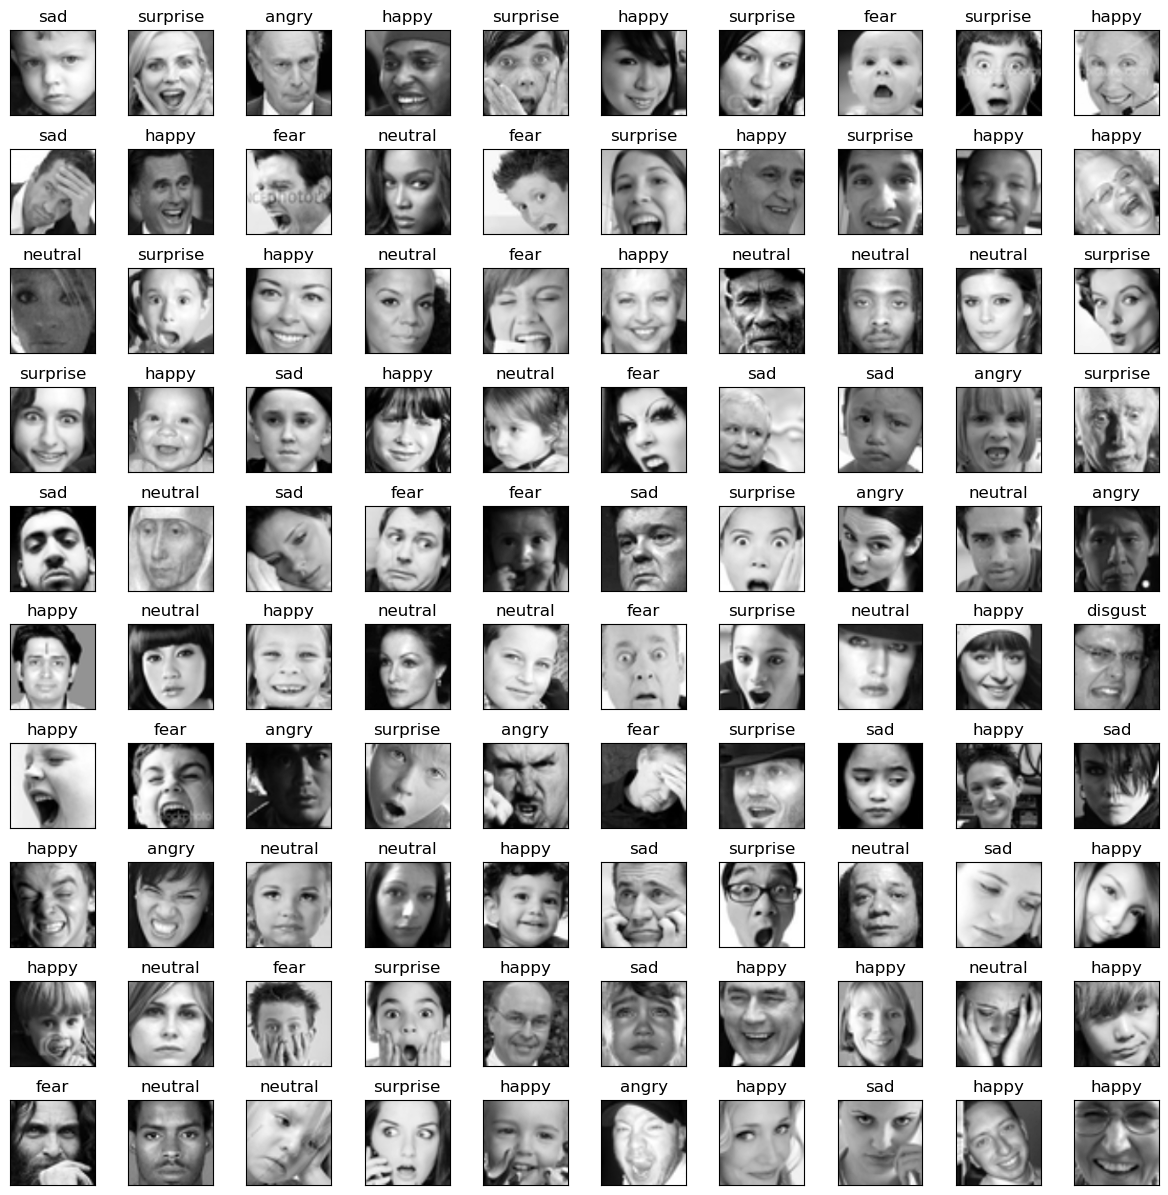

In [12]:
import matplotlib.pyplot as plt

fig =plt.figure(figsize = (15,15))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1,xticks = [],yticks = [])
    ax.imshow(np.squeeze(x_train[i]),cmap = 'gray')
    ax.set_title(emotion[int(y_train[i])])
plt.subplots_adjust(hspace=0.4)

In [13]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [14]:
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1)
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1)

In [15]:
y_train = utils.to_categorical(y_train, 7)
y_test = utils.to_categorical(y_test, 7)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [17]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(filters=56, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=56, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=112, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=112, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(112, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

METRICS = ['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 28)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 28)        │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 28)        │           7,084 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100, 28)        │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 56)          │          14,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 50, 56)          │             224 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 56)          │          28,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 50, 50, 56)          │             224 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 56)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25, 25, 56)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 112)         │          56,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 25, 25, 112)         │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 112)         │         113,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 25, 25, 112)         │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 112)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 112)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,028,187 (7.74 MB)

 Trainable params: 2,027,403 (7.73 MB)

 Non-trainable params: 784 (3.06 KB)

In [19]:
checkpoint = ModelCheckpoint('emotion_model-{epoch:03d}.keras', monitor='val_accuracy', verbose=0, save_best_only=True, mode='auto')
history = model.fit(x_train, y_train, epochs=120, validation_data=(x_test,y_test), callbacks=[checkpoint])

Epoch 1/120
898/898 ━━━━━━━━━━━━━━━━━━━━ 1195s 1s/step - accuracy: 0.2418 - loss: 2.3837 - precision: 0.3640 - recall: 0.0387 - val_accuracy: 0.3018 - val_loss: 1.7125 - val_precision: 0.8243 - val_recall: 0.0549
Epoch 2/120
898/898 ━━━━━━━━━━━━━━━━━━━━ 1330s 1s/step - accuracy: 0.2713 - loss: 1.7333 - precision: 0.7139 - recall: 0.0931 - val_accuracy: 0.3133 - val_loss: 1.6994 - val_precision: 0.9207 - val_recall: 0.0582
Epoch 3/120
898/898 ━━━━━━━━━━━━━━━━━━━━ 1302s 1s/step - accuracy: 0.2896 - loss: 1.6860 - precision: 0.7706 - recall: 0.1124 - val_accuracy: 0.3207 - val_loss: 1.6164 - val_precision: 0.7130 - val_recall: 0.1744
Epoch 4/120
898/898 ━━━━━━━━━━━━━━━━━━━━ 1355s 2s/step - accuracy: 0.2974 - loss: 1.6630 - precision: 0.8062 - recall: 0.1216 - val_accuracy: 0.3454 - val_loss: 1.5969 - val_precision: 0.8924 - val_recall: 0.1294
Epoch 5/120
898/898 ━━━━━━━━━━━━━━━━━━━━ 1388s 2s/step - accuracy: 0.3006 - loss: 1.6447 - precision: 0.8241 - recall: 0.1262 - val_accuracy: 0.3323

In [20]:
np.save('x_test.npy',x_test)

In [21]:
np.save('y_test.npy',y_test)

In [22]:
np.save('x_train.npy',x_train)

In [23]:
np.save('y_train.npy',y_train)

In [1]:
from keras.models import load_model

model = load_model('emotion_model-099.keras')

In [2]:
import numpy as np

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 225ms/step


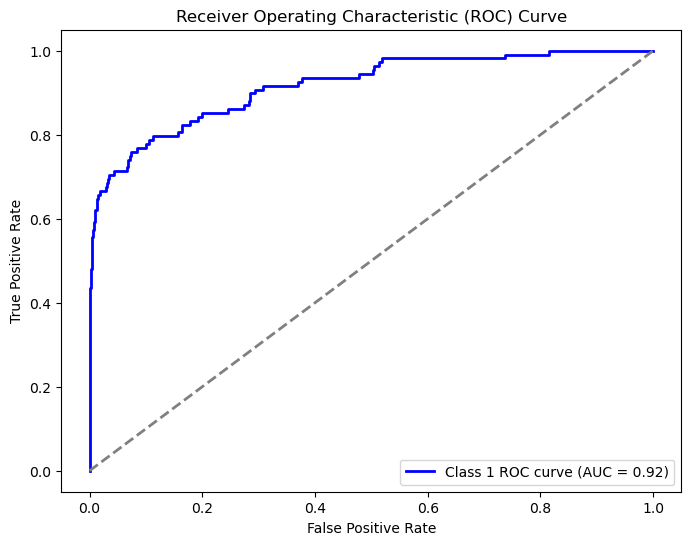

In [4]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

class_of_interest = 1
y_pred_proba = model.predict(x_test)
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])[:, class_of_interest]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba[:, class_of_interest])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Class {class_of_interest} ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 50s 223ms/step


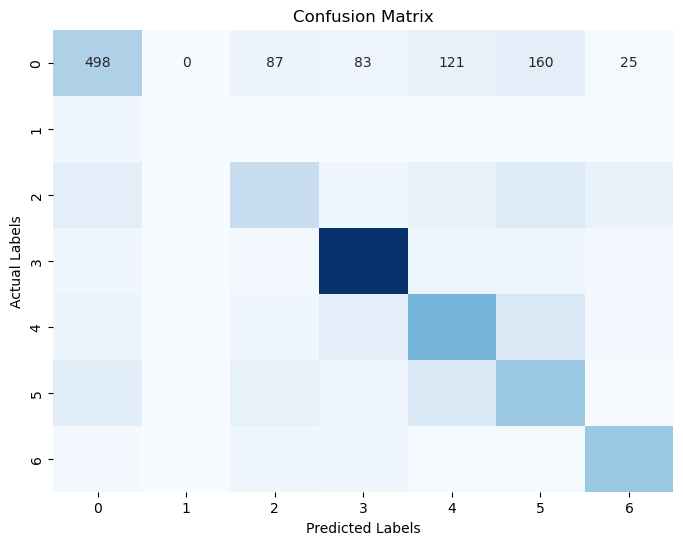

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred_proba = model.predict(x_test)

y_pred = np.argmax(y_pred_proba, axis=1)

y_test_single = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_single, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_single),  
            yticklabels=np.unique(y_test_single))

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()
